# View Montage of Activations from GoogLeNet

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
from keras.layers import Input
from keras.models import Model

In [2]:
# To avoid: 
# StdErr from Kernel Process OMP: Error #15: Initializing libiomp5md.dll, but found libiomp5 already initialized. 
# OMP: Hint This means that multiple copies of the OpenMP runtime have been linked into the program.

import os

os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [3]:
model = InceptionV3(input_tensor=Input(shape=(375, 375, 3)))
layers = model.layers
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 375, 375, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 187, 187, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 187, 187, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

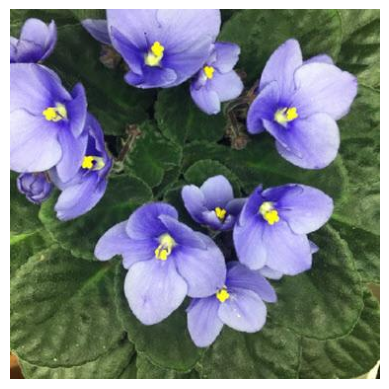

In [4]:
violet = cv.imread("../data/violet.jpg")
violet = cv.cvtColor(violet, cv.COLOR_BGR2RGB)

plt.figure()
plt.imshow(violet)
plt.axis("off")
plt.show()

In [5]:
def intermediate_layer_output(model, image, layer):
    layer_model = Model(inputs=model.input,
                        outputs=model.get_layer(layer).output)
    layer_output = layer_model.predict(tf.expand_dims(image.astype(float), axis=0), verbose=False)

    return layer_output

def normalize_show_data(data, fig_rows_cols, figsize):
    # Each activation can take any value, so it is useful to scale the activations before you display them.
    normalized_data = (data - tf.math.reduce_min(data)) / (tf.math.reduce_max(data) - tf.math.reduce_min(data))

    fig, axs = plt.subplots(fig_rows_cols[0], fig_rows_cols[1], figsize=figsize)
    k = 0
    for i in range(fig_rows_cols[0]):
        for j in range(fig_rows_cols[1]):
            axs[i, j].imshow(normalized_data[0, :, :, k], cmap='gray')
            axs[i, j].axis("off")
            k += 1
    plt.show()

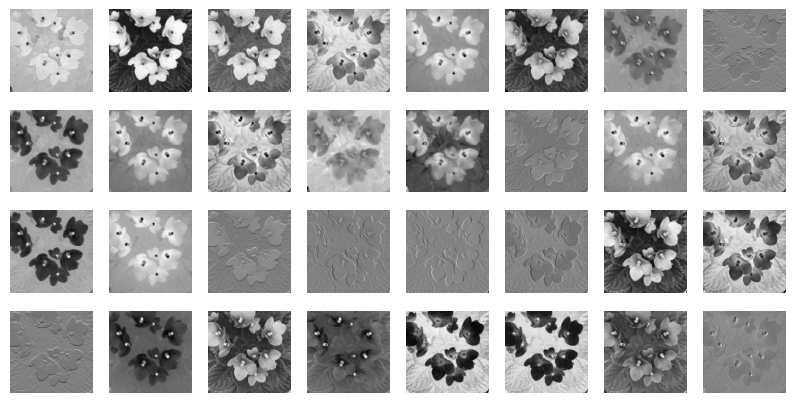

In [6]:
violet_conv2D_output = intermediate_layer_output(model, violet, "conv2d")
normalize_show_data(violet_conv2D_output, (4, 8), (10, 5))

We have used the "conv2d" layer to extract features. The activations from a layer are the output of that layer. We can learn more about the activations by investigating the layer's properties.
These properties can be displayed by accessing any individual layer in a network.

In [7]:
layers[1].get_config()

{'name': 'conv2d',
 'trainable': True,
 'dtype': 'float32',
 'filters': 32,
 'kernel_size': (3, 3),
 'strides': (2, 2),
 'padding': 'valid',
 'data_format': 'channels_last',
 'dilation_rate': (1, 1),
 'groups': 1,
 'activation': 'linear',
 'use_bias': False,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

The convolution layer has hyperparameters and learnable parameters. Hyperparameters are set when the network is created and do not change during training. Learnable parameters are updated during training.
The weights of this convolution layer are stored in a 4-D array. The size of the fourth dimension, 32, is the number of channels.
To view all channels for a layer, we first need to get the activations.

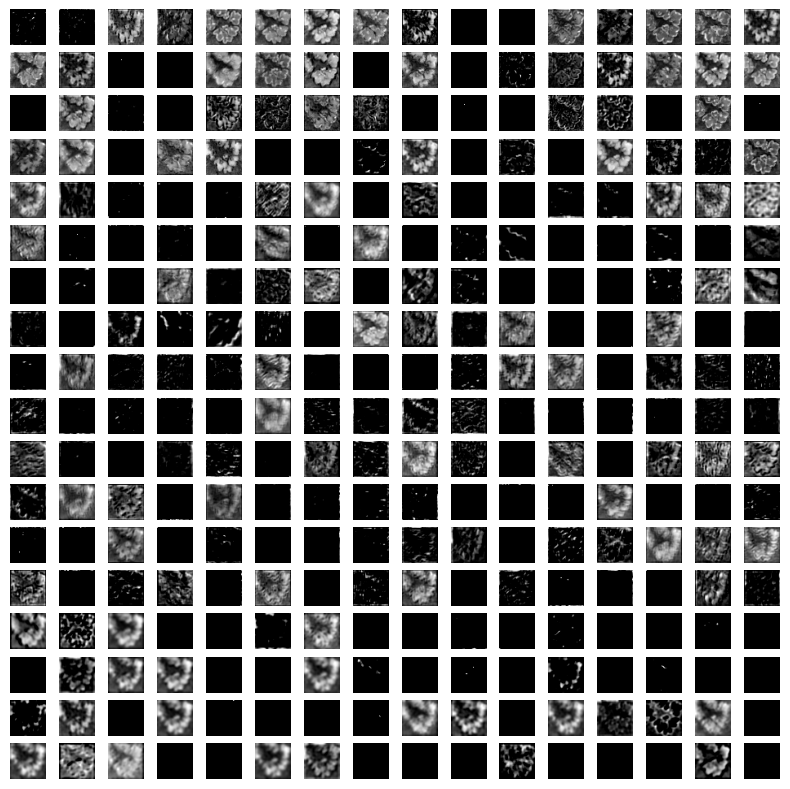

In [8]:
violet_intermediate_output = intermediate_layer_output(model, violet, "mixed1")
normalize_show_data(violet_intermediate_output, (18, 16), (10, 10))

There is one image displayed for each of the 288 channels from the "mixed1" layer. Generally, each of these channels contains one feature that is used for classification deeper in the architecture.
The next layer is a pooling layer. We can see the features that are used for classification by visualizing these activations.

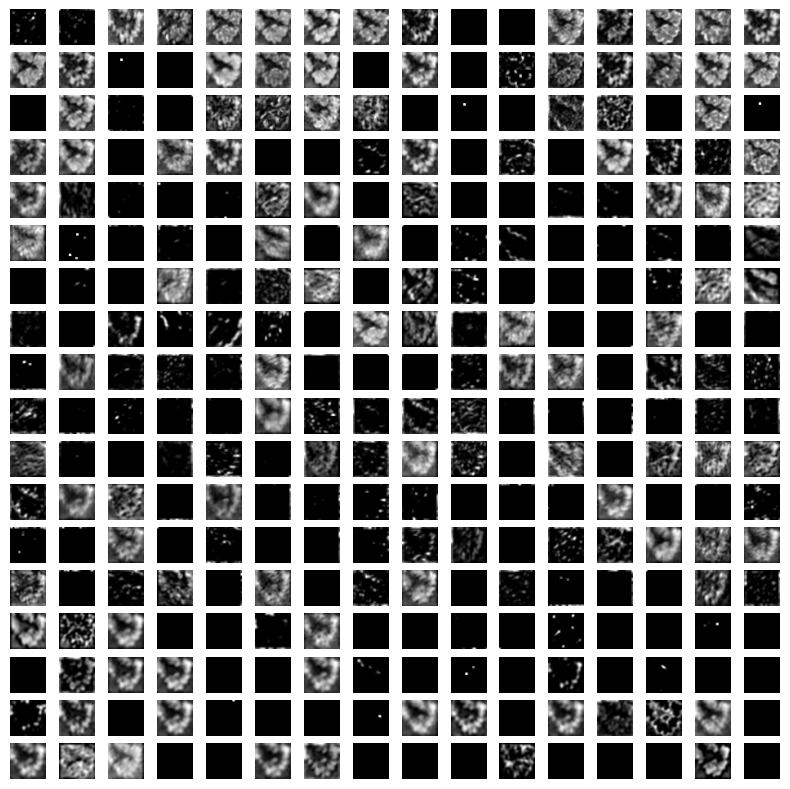

In [9]:
violet_pool_output = intermediate_layer_output(model, violet, "average_pooling2d_2")
normalize_show_data(violet_pool_output, (18, 16), (10, 10))